<a href="https://colab.research.google.com/github/brooke57/BrainTumorImageClassification/blob/main/Drug_Discovery_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Drug Discovery Data Collection for TKR_FLT3**

For much of this project, I will be following tutorials from the Data professor, who has a [youtube channel](https://www.youtube.com/channel/UCV8e2g4IWQqK71bbzGDEI4Q) and [github](https://github.com/dataprofessor/code/tree/master/python).

In [ ]:
!pip install rdkit-pypi

     |████████████████████████████████| 20.6 MB 34.1 MB/s 


In [ ]:
from rdkit import Chem

## **Install ChEMBL web service package**

In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 596 kB 5.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


## **Importing Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Target search for 
target = new_client.target
target_query = target.search('Tyrosine-protein kinase receptor FLT3')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Receptor-type tyrosine-protein kinase FLT3,33.0,False,CHEMBL2034796,"[{'accession': 'Q00342', 'component_descriptio...",SINGLE PROTEIN,10090.0
1,"[{'xref_id': 'P36888', 'xref_name': None, 'xre...",Homo sapiens,Tyrosine-protein kinase receptor FLT3,32.0,False,CHEMBL1974,"[{'accession': 'P36888', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Homo sapiens,Protein cereblon/Tyrosine-protein kinase recep...,32.0,False,CHEMBL4630730,"[{'accession': 'P36888', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
3,[],Homo sapiens,VHL/FLT3,30.0,False,CHEMBL4523735,"[{'accession': 'P36888', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606.0
4,"[{'xref_id': 'Q06418', 'xref_name': None, 'xre...",Homo sapiens,Tyrosine-protein kinase receptor TYRO3,20.0,False,CHEMBL5314,"[{'accession': 'Q06418', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
5725,[],Homo sapiens,Lysophosphatidylcholine acyltransferase 1,0.0,False,CHEMBL4295903,"[{'accession': 'Q8NF37', 'component_descriptio...",SINGLE PROTEIN,9606.0
5726,[],Homo sapiens,Glycerol-3-phosphate acyltransferase 3,0.0,False,CHEMBL4523318,"[{'accession': 'Q53EU6', 'component_descriptio...",SINGLE PROTEIN,9606.0
5727,[],Homo sapiens,Geranylgeranyl transferase type-2,0.0,False,CHEMBL4523994,"[{'accession': 'P53611', 'component_descriptio...",PROTEIN COMPLEX,9606.0
5728,[],Rattus norvegicus,Geranylgeranyl transferase type-2,0.0,False,CHEMBL4523995,"[{'accession': 'Q08603', 'component_descriptio...",PROTEIN COMPLEX,10116.0


### **Select the correct version of Tyrosine-protein kinase receptor FLT3**

In [ ]:
targets.columns

Index(['cross_references', 'organism', 'pref_name', 'score',
       'species_group_flag', 'target_chembl_id', 'target_components',
       'target_type', 'tax_id'],
      dtype='object')

In [ ]:
sel_tar = targets['target_chembl_id'][1]
sel_tar

'CHEMBL1974'

Now, I want to retrieve bioactivity data for Tyrosine-protein kinase receptor FLT3 

In [ ]:
activity = new_client.activity
refine = activity.filter(target_chembl_id=sel_tar)

In [ ]:
df = pd.DataFrame.from_dict(refine)

In [ ]:
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,572148,[],CHEMBL770281,Inhibition of Protein kinase Flt-3 at 10 uM,B,None,None,BAO_0000201,BAO_0000357,single protein format,O=C(O)Cc1c2ccccc2n2c1[nH]c(=O)c1ccccc12,None,None,CHEMBL1144893,J. Med. Chem.,2003.0,None,CHEMBL92361,None,CHEMBL92361,None,False,http://qudt.org/vocab/unit#Percent,163302,=,1,True,=,None,Inhibition,%,None,41.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,None,None,Inhibition,%,UO_0000187,None,41.0
1,None,866063,[],CHEMBL766072,Inhibition of chimeric PDGF receptor with FLT-...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,None,None,CHEMBL1135998,J. Med. Chem.,2002.0,"{'bei': '11.95', 'le': '0.22', 'lle': '1.61', ...",CHEMBL330863,None,CHEMBL330863,6.89,False,http://www.openphacts.org/units/Nanomolar,237034,=,1,True,=,None,IC50,nM,None,128.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,None,None,IC50,uM,UO_0000065,None,0.128
2,None,872532,[],CHEMBL766072,Inhibition of chimeric PDGF receptor with FLT-...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,None,None,CHEMBL1135998,J. Med. Chem.,2002.0,"{'bei': '11.83', 'le': '0.22', 'lle': '1.63', ...",CHEMBL124660,TANDUTINIB,CHEMBL124660,6.66,True,http://www.openphacts.org/units/Nanomolar,237044,=,1,True,=,None,IC50,nM,None,220.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,None,None,IC50,uM,UO_0000065,None,0.22
3,Active,872555,[],CHEMBL679500,Inhibition of Flt3/ITD mutant expressed in hem...,F,None,None,BAO_0000376,BAO_0000219,cell-based format,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,None,None,CHEMBL1135998,J. Med. Chem.,2002.0,None,CHEMBL124660,TANDUTINIB,CHEMBL124660,None,False,None,237044,None,1,False,None,None,Inhibition,None,None,None,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,None,None,Inhibition,None,None,None,None
4,None,872564,[],CHEMBL766072,Inhibition of chimeric PDGF receptor with FLT-...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,None,None,CHEMBL1135998,J. Med. Chem.,2002.0,"{'bei': '9.30', 'le': '0.17', 'lle': '0.55', '...",CHEMBL126699,None,CHEMBL126699,5.06,False,http://www.openphacts.org/units/Nanomolar,237033,=,1,True,=,None,IC50,nM,None,8790.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,None,None,IC50,uM,UO_0000065,None,8.79


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11694 entries, 0 to 11693
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_comment           3137 non-null   object 
 1   activity_id                11694 non-null  int64  
 2   activity_properties        11694 non-null  object 
 3   assay_chembl_id            11694 non-null  object 
 4   assay_description          11694 non-null  object 
 5   assay_type                 11694 non-null  object 
 6   assay_variant_accession    2544 non-null   object 
 7   assay_variant_mutation     3249 non-null   object 
 8   bao_endpoint               11694 non-null  object 
 9   bao_format                 11694 non-null  object 
 10  bao_label                  11694 non-null  object 
 11  canonical_smiles           11682 non-null  object 
 12  data_validity_comment      40 non-null     object 
 13  data_validity_description  40 non-null     obj

In [ ]:
df.standard_type.unique()

array(['Inhibition', 'IC50', 'Kd', 'Activity', 'Ki', 'EC50',
       'Selectivity', 'Residual activity', 'Inihibition',
       'Residual Activity', 'Ratio IC50', 'K', 'T1/2', 'GI50', 'INH',
       'FC', 'Ratio', '% Control', '% residual kinase activity', '% Ctrl',
       '% Residual activity with Skepinone-L'], dtype=object)

In [ ]:
# Only want the standard type reported as IC50 as this is unit type we will use to make the target categories.
# IC 50 values are reported in the nM (Nanomolar) unit
final_df = df.loc[df['standard_type'] == 'IC50']
final_df['standard_type'].value_counts()

IC50    4041
Name: standard_type, dtype: int64

In [ ]:
final_df.to_csv('TKR_Bioactivity_Data.csv')

## **Putting Files into Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data’: File exists


In [ ]:
! cp TKR_Bioactivity_Data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

cp: cannot stat 'TKR_Bioactivity_Data.csv': No such file or directory


In [ ]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

total 2311
-rw------- 1 root root 2366105 Feb 15 21:15 TKR_Bioactivity_Data.csv


In [ ]:
final_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/TKR_Bioactivity_Data.csv")

## **Missing Data Manipulation**

In [ ]:
# Need to drop rows which have no value for standard value, since this will be the target
final_df2 = final_df[final_df.standard_value.notna()]
final_df2

,Unnamed: 0,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,1,NaN,866063,[],CHEMBL766072,Inhibition of chimeric PDGF receptor with FLT-...,B,NaN,NaN,BAO_0000190,BAO_0000219,cell-based format,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,NaN,NaN,CHEMBL1135998,J. Med. Chem.,2002.0,"{'bei': '11.95', 'le': '0.22', 'lle': '1.61', ...",CHEMBL330863,NaN,CHEMBL330863,6.89,False,http://www.openphacts.org/units/Nanomolar,237034,=,1,True,=,NaN,IC50,nM,NaN,128.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.128
1,2,NaN,872532,[],CHEMBL766072,Inhibition of chimeric PDGF receptor with FLT-...,B,NaN,NaN,BAO_0000190,BAO_0000219,cell-based format,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,NaN,NaN,CHEMBL1135998,J. Med. Chem.,2002.0,"{'bei': '11.83', 'le': '0.22', 'lle': '1.63', ...",CHEMBL124660,TANDUTINIB,CHEMBL124660,6.66,True,http://www.openphacts.org/units/Nanomolar,237044,=,1,True,=,NaN,IC50,nM,NaN,220.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.220
2,4,NaN,872564,[],CHEMBL766072,Inhibition of chimeric PDGF receptor with FLT-...,B,NaN,NaN,BAO_0000190,BAO_0000219,cell-based format,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,NaN,NaN,CHEMBL1135998,J. Med. Chem.,2002.0,"{'bei': '9.30', 'le': '0.17', 'lle': '0.55', '...",CHEMBL126699,NaN,CHEMBL126699,5.06,False,http://www.openphacts.org/units/Nanomolar,237033,=,1,True,=,NaN,IC50,nM,NaN,8790.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,8.790
3,5,NaN,879718,[],CHEMBL766072,Inhibition of chimeric PDGF receptor with FLT-...,B,NaN,NaN,BAO_0000190,BAO_0000219,cell-based format,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,NaN,NaN,CHEMBL1135998,J. Med. Chem.,2002.0,"{'bei': '10.52', 'le': '0.20', 'lle': '1.36', ...",CHEMBL445636,NaN,CHEMBL445636,5.72,False,http://www.openphacts.org/units/Nanomolar,237035,=,1,True,=,NaN,IC50,nM,NaN,1910.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.910
4,6,NaN,884645,[],CHEMBL766072,Inhibition of chimeric PDGF receptor with FLT-...,B,NaN,NaN,BAO_0000190,BAO_0000219,cell-based format,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,NaN,NaN,CHEMBL1135998,J. Med. Chem.,2002.0,NaN,CHEMBL941,IMATINIB,CHEMBL941,NaN,False,http://www.openphacts.org/units/Nanomolar,237053,>,1,True,>,NaN,IC50,nM,NaN,30000.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,30.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,10889,Not Active,20739016,[],CHEMBL4511057,NanoBRET (SGC Frankfurt) (FLT3),B,NaN,NaN,BAO_0000190,BAO_0000357,single protein format,CN1CCN(C(=O)C(C)(C)c2ccc(C(=O)Nc3cn4cc(-c5cc(C...,Non standard unit for type,Units for this activity type are unusual and m...,CHEMBL4507307,NaN,2021.0,NaN,CHEMBL4576555,T3-CLK-N,CHEMBL4576555,NaN,False,NaN,3359744,>,54,False,>,NaN,IC50,µM,NaN,10.0,CHEMBL1974,Homo sapiens,Tyrosine-protein kinase receptor FLT3,9606,NaN,NaN,IC50,µM,NaN,NaN,10.000
4037,10890,Not Active,20739017,[],CHEMBL4511058,NanoBRET (SGC Frankfurt) (FLT3 (D835V)),B,P36888,D835V,BAO_0000190,BAO_0000357,single protein format,CN1C

In [ ]:
# Check for duplicated chemicals
final_df2.duplicated('molecule_chembl_id').value_counts()

False    2860
True     1083
dtype: int64

In [ ]:
# Drop the duplicates
final_df2 = final_df2.drop_duplicates('molecule_chembl_id')

In [ ]:
# Looking to see if all units are the same or not
final_df2['standard_units'].value_counts()

nM         2844
ug.mL-1      14
µM            2
Name: standard_units, dtype: int64

It looks like not all of the units are in the desired nM unit; this means that the other units will have to either be converted to nM or dropped. For the entries with the 'ug.mL-1' unit, conversion to the nanomolar unit would require first calculating the unique molar mass of each chemical compound. This would make the calculation process more time than it is worth, since there are only 15 entries with this unit. All that would be required to conver the entries with the micromolar (µM) unit is to multiply these values by one thousand, but since there are only 2 it makes more sense to drop chemicals with these units as well.

In [ ]:
# Dropping chemicals not in unit 'nM'
final_df2 = final_df2.loc[final_df2['standard_units'] == 'nM']

In [ ]:
# Checking to see that the values are dropped
final_df2['standard_units'].value_counts()

nM    2844
Name: standard_units, dtype: int64

## **Categorizing Compounds According to Bioactivity Level**

In [ ]:
bio_level = []
for i in final_df2['standard_value']:
  if float(i) >= 10000:
    bio_level.append("inactive")
  elif float(i) <= 1000:
    bio_level.append("active")
  else:
    bio_level.append("intermediate")


In [ ]:
# Counting the different classes for a bar graph
active = bio_level.count('active')
intermediate = bio_level.count('intermediate')
inactive = bio_level.count('inactive')
bio_list = [active, intermediate, inactive]
bio_names = ['active', 'intermediate', 'inactive']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


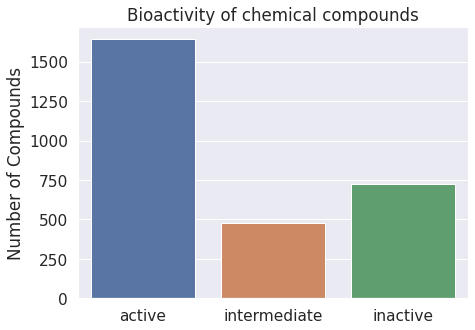

In [ ]:
# Plotting a bargraph to visualize class imbalance
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4)
sns.barplot(bio_names, bio_list)
plt.ylabel("Number of Compounds")
plt.title('Bioactivity of chemical compounds');

Combining the intermediate and inactive classes would reduce the class imbalance, which would make for more accurate modeling. I will do this after selecting relevant features.

## **Selection of features to be used in Modeling**

Since not all of the features in the original dataset will need to be used, I will select the most important ones, as outlined by the data professor (molecule_chembl_id, canonical_smiles, standard_value)

In [ ]:
# Putting the molecule_chembl_id in a list
mol_id = [i for i in final_df2['molecule_chembl_id']]

In [ ]:
# Putting canonical_smiles into a list
canon_smiles = [i for i in final_df2['canonical_smiles']]

In [ ]:
# Putting standard_value into a list
std_value = [i for i in final_df2['standard_value']]

In [ ]:
# Combining relevant lists into a dataframe
df_tuples = list(zip(mol_id, canon_smiles, std_value, bio_level))
sel_df = pd.DataFrame(df_tuples, columns=['mol_id', 'canon_smiles', 'std_value', 'bio_level'])

In [ ]:
sel_df

,mol_id,canon_smiles,std_value,bio_level
0,CHEMBL330863,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,128.0,active
1,CHEMBL124660,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,220.0,active
2,CHEMBL126699,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,8790.0,intermediate
3,CHEMBL445636,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,1910.0,intermediate
4,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,30000.0,inactive
...,...,...,...,...
2839,CHEMBL1971943,Cc1c[nH]c2nccc(Oc3c(F)cc(Nc4cc(Cl)nc(N)n4)cc3F...,303.0,active
2840,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0,active
2841,CHEMBL4531334,CN1CCN(C(=O)C(C)(C)c2ccc(C(=O)Nc3cn4cc(-c5ccnc...,668.0,active
2842,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0,active


In [ ]:
# Dictionary for combining intermediate and inactive classes
activity = {'active': 'active',
            'intermediate': 'inactive',
            'inactive': 'inactive'}

In [ ]:
sel_df['Bioactivity'] = sel_df['bio_level'].map(activity)

In [ ]:
sel_df.head()

,mol_id,canon_smiles,std_value,bio_level,Bioactivity
0,CHEMBL330863,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,128.0,active,active
1,CHEMBL124660,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,220.0,active,active
2,CHEMBL126699,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,8790.0,intermediate,inactive
3,CHEMBL445636,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,1910.0,intermediate,inactive
4,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,30000.0,inactive,inactive


In [ ]:
sel_df['bio_level'].value_counts()

active          1641
inactive         727
intermediate     476
Name: bio_level, dtype: int64

In [ ]:
sel_df['Bioactivity'].value_counts()

active      1641
inactive    1203
Name: Bioactivity, dtype: int64

In [ ]:
sel_df2 = sel_df.drop(['bio_level'], axis=1)

In [ ]:
sel_df2.head()

,mol_id,canon_smiles,std_value,Bioactivity
0,CHEMBL330863,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,128.0,active
1,CHEMBL124660,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,220.0,active
2,CHEMBL126699,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,8790.0,inactive
3,CHEMBL445636,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,1910.0,inactive
4,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,30000.0,inactive


In [ ]:
from google.colab import files

sel_df2.to_csv('preprocessed_TKR_bioactivity_data.csv', index=False, encoding = 'utf-8-sig')
files.download('preprocessed_TKR_bioactivity_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
! ls -l

ls: cannot access 'drive': Transport endpoint is not connected
total 500
d????????? ? ?    ?         ?            ? drive
drwx------ 5 root root   4096 Feb 16 21:54 gdrive
-rw-r--r-- 1 root root 255576 Feb 16 21:51 preprocessed_TKR_bioactivity_data
-rw-r--r-- 1 root root 242465 Feb 16 21:55 preprocessed_TKR_bioactivity_data.csv
drwxr-xr-x 1 root root   4096 Feb  1 14:32 sample_data


In [ ]:
! cp preprocessed_TKR_bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file
